# **Day - 49 : End-to-End Regression Challenge**

*1.*

*What is  meant by "regression" in supervised  machine learning?* 

>In supervised machine learning, regression means predicting a continuous numeric value based on input features.
Example: Predicting someone’s salary, house price, or temperature based on things like experience, size, or time.
So, unlike classification (which predicts categories like “spam” or “not spam”), regression is all about numbers.

*2.*

*Load the house_prediction dataset using pandas. Check for missing values, shape of the DataFrame and for duplicates.* 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
df = pd.read_csv("Data/house_price_prediction_data.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
df.shape

(414, 8)

In [5]:
df.duplicated().sum()

0

*3.*

*In  machine  learning,  what  is  the  meaning  of  "continuous values"?  Which  columns  in  the  DataFrame  above  have continuous values?* 

>Continuous values in machine learning are numerical values that can take on any number within a range—including decimals. They’re not limited to fixed categories or whole numbers.
Examples:
Height (e.g., 170.5 cm)
Temperature (e.g., 36.6°C)
Price (e.g., $499.99)

*4.*

*What is the main goal of  Exploratory Data Analysis (EDA)?* 

>The main goal of Exploratory Data Analysis (EDA) is to understand the data before building a model.
You do EDA to:
1. Spot patterns, trends, or outliers
2. Check for missing values or weird data
3. Understand relationships between variables
4. Guide your next steps in cleaning, transforming, or modeling the data.

>Think of EDA like getting to know someone before going into a serious relationship—you need to know what you’re working with.

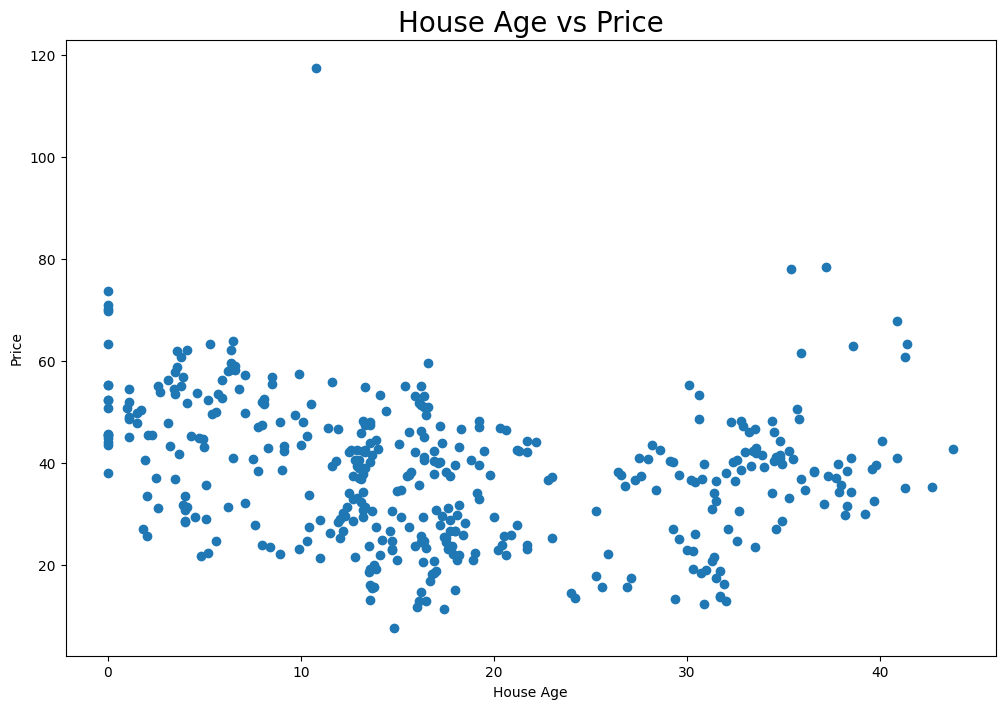

In [6]:
# a. Plot a scatter plot of the " X2 house age" column and "Y house price of unit area" column. This will reveal any relationship between this variable and the target column.


plt.figure(figsize = (12, 8))
plt.scatter(x = df["X2 house age"], 
            y = df["Y house price of unit area"])
plt.xlabel("House Age")
plt.ylabel("Price")
plt.title( "House Age vs Price", fontsize = 20)
plt.show()

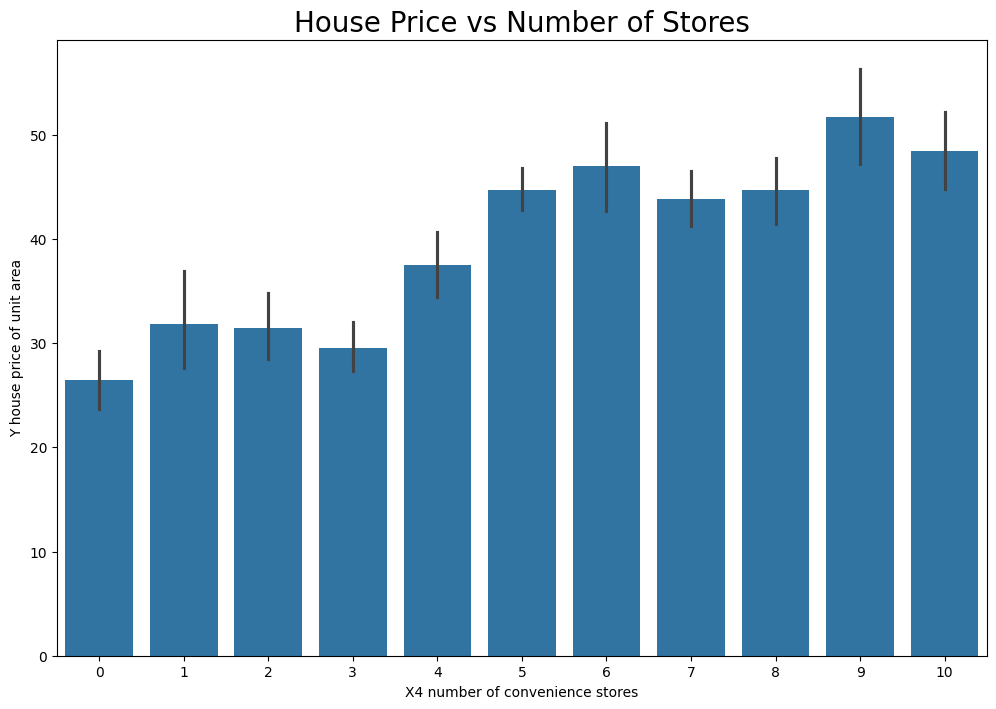

In [7]:
# b. Using seaborn, plot a barplot of "X4 number of convenience stores" column and the "Y house price of unit area". Is there a correlation between the number of stores and the price of the house?

plt.figure(figsize=(12,8))
sns.barplot(data=df, 
            x=df["X4 number of convenience stores"], 
            y=df["Y house price of unit area"])
plt.title("House Price vs Number of Stores", fontsize = 20)
plt.show()

Mean price is: 37.98


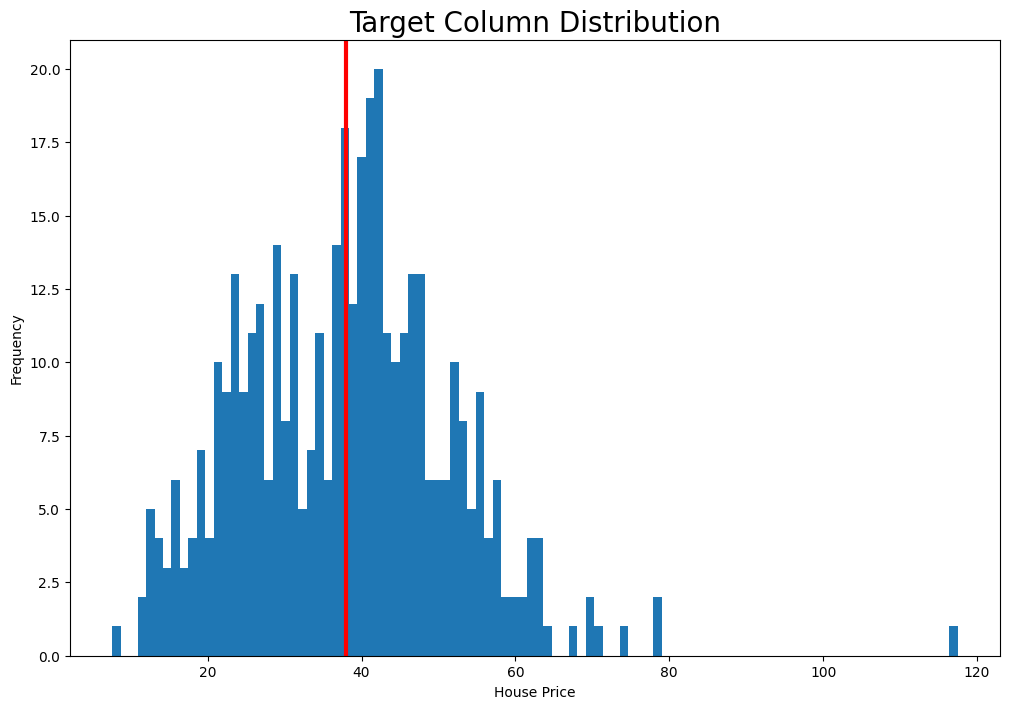

In [8]:
# c. To check the distribution of data, using Matplotlib, create a hist plot of the "Y house price of unit area" column(target column). What is the mean of the column? Add a mean line to the plot. Do you notice ant outliers in the data?

plt.figure(figsize=(12,8))
plt.hist(df["Y house price of unit area"], 
         bins= 100)

print(f'Mean price is: {df["Y house price of unit area"].mean():.2f}')

plt.axvline(df["Y house price of unit area"].mean(), 
            color='Red', 
            linestyle='solid', 
            linewidth=3)
plt.ylabel("Frequency")
plt.xlabel("House Price")
plt.title("Target Column Distribution", fontsize = 20)
plt.show()

In [9]:
df_copy = df.copy()

In [10]:
df_copy = df_copy[df_copy["Y house price of unit area"] < 115]

In [11]:
df_copy = df_copy.drop(columns=["No"])
df_copy.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
def convert_column(column):
    column =  column.astype("str")
    df_copy [["X1 Transaction Year", "Date"]] = column.str.split(".", expand = True).astype(int)
    df_copy.drop(columns=["X1 transaction date","Date" ], inplace=True)
    return df_copy.head()

convert_column(df_copy["X1 transaction date"])

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 Transaction Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


*5.*

*Create a copy of the DataFrame and drop all rows that have values of over 115 in the "Y house price of unit area" column. These are outliers.* 

*6.*

*As  you  may  have  noticed,  the  "No"  column  is  an  index column.  Since  our  DataFrame  has  a  numeric  index,  drop this column.* 

*7.*

*Extract the year from the "X1 transaction date" column and create a year column called "X1 Transaction Year." Drop the "X1 transaction date" from the DataFrame. The "X1 Transaction Year" should be the only date column.* 

*8.*

*Shuffling a DataFrame is important in machine learning to avoid any bias that may be introduced when the data is ordered in a certain way. Our data seem to have a particular order. The prices and sizes are ordered from smallest to largest. This may create bias. Using scikit-learn, shuffle the DataFrame.* 

In [13]:
df_shuffled = shuffle(df_copy, random_state = 42)
df_shuffled.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 Transaction Year
395,21.2,512.5487,4,24.97400,121.53842,42.5,2012
350,13.2,492.2313,5,24.96515,121.53737,42.3,2013
401,7.6,2175.0300,3,24.96305,121.51254,27.7,2013
354,12.2,1360.1390,1,24.95204,121.54842,30.1,2013
181,11.6,201.8939,8,24.98489,121.54121,55.9,2013


*9.*

*Write a code to separate the DataFrame into X and y variables. X for feature columns and y for the target column. Use scikit-learn's train_test_split function to split the X and y variables into training and test sets. Make the test set to be 10% of the data.* 

In [14]:
X = df_shuffled.drop(columns=["Y house price of unit area"])
y = df_shuffled["Y house price of unit area"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=23)

*10.*

*Using scikit-learn LinearRegression, select the model for your data based on the size of your dataset. Ensure that your data is scaled before fitting. Use the r2_score, and MSE(mean squared error) metrics to evaluate the model. What conclusion can you draw from the score results?* 

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'The r2_score is: {r2_score:.2f}')
print(f'The mean squared error is: {mse:.2f}')

TypeError: 'numpy.float64' object is not callable

*11.*

*Use the cross validation function to assess the performance of a model on unseen data. Use the LinearRegression model.Make the number of folds 10.a* 

In [17]:
reg_2 = LinearRegression()
scores = cross_val_score(reg_2, X, y, cv=10, scoring ='r2')
print(f'The accuracy score is {scores.mean():.2f}')

The accuracy score is 0.60


*12.*

*Save the model you fitted in questin 10 using joblib. Load the model and make predictions on x_test.* 

In [18]:

joblib.dump(reg, 'regression_model.joblib')

['regression_model.joblib']

In [19]:
reg_loaded = joblib.load("regression_model.joblib")

model_predictions = reg_loaded.predict(X_test)
model_predictions

array([27.09757879, 51.44825839, 34.04118703, 30.39047647, 13.82357914,
       16.69349041, 42.60603813, 27.15964181, 45.86711546, 48.67321448,
       45.85921106, 14.605422  , 33.08864684, 37.19218743, 37.48843452,
       33.42672213, 39.26182668, 41.94741088, 51.41722688, 47.36001613,
       41.62995642, 26.03667193, 51.2523784 , 43.91308039, 51.35516386,
       32.61166218, 30.86537266, 31.62878771, 45.78739233, 44.53276692,
       39.49156072, 47.34957458, 34.68217714, 44.10032808, 44.13135959,
       45.16105813, 14.38079497, 42.60603813, 38.41266862, 43.52172732,
       44.54134562, 34.93780812])